In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetic_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Dataset preparation
After reviewing the dataset description available at: [hindawi bio med research](https://www.hindawi.com/journals/bmri/2014/781670/tab1/) I discovered that missing values in the dataset are indicated by the symbol '?'. In order to ensure unbiased experimentation, features such as 'payer_code', 'weight', and 'medical_specialty', which contain a significant number of missing values, will be excluded during the dataset preparation process.
Additionally, 'patient_nbr' and 'encounter_id' will be removed from the dataset as they do not provide any valuable information for our analysis.

In [4]:
# missing values are representated with "?" in the dataset. so we will replace "?" with nan and sum
df = df.replace('?', np.nan)

# sum total number of missing values 
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [5]:
# drop uneeded columns from the data
df = df.drop(['weight', 'patient_nbr', 'encounter_id','payer_code', 'medical_specialty'], axis=1)

#print column names
print(df.columns.values)

['race' 'gender' 'age' 'admission_type_id' 'discharge_disposition_id'
 'admission_source_id' 'time_in_hospital' 'num_lab_procedures'
 'num_procedures' 'num_medications' 'number_outpatient' 'number_emergency'
 'number_inpatient' 'diag_1' 'diag_2' 'diag_3' 'number_diagnoses'
 'max_glu_serum' 'A1Cresult' 'metformin' 'repaglinide' 'nateglinide'
 'chlorpropamide' 'glimepiride' 'acetohexamide' 'glipizide' 'glyburide'
 'tolbutamide' 'pioglitazone' 'rosiglitazone' 'acarbose' 'miglitol'
 'troglitazone' 'tolazamide' 'examide' 'citoglipton' 'insulin'
 'glyburide-metformin' 'glipizide-metformin' 'glimepiride-pioglitazone'
 'metformin-rosiglitazone' 'metformin-pioglitazone' 'change' 'diabetesMed'
 'readmitted']


# modifications to that i will make to the data
1. missing values in 'race' will be replaced with the most frequently occuring instance 'mode' as it is common practice [2]
2. missing values in the diagnosis variables will be replaced with 'unknown' 

In [6]:
# Fill missing values for race with the most common race
df['race'] = df['race'].fillna(df['race'].mode()[0])

# Fill missing values for all 3 diagnosis with 'unknown'
df[['diag_1', 'diag_2', 'diag_3']] = df[['diag_1', 'diag_2', 'diag_3']].fillna('unknown')

# Check for missing values again
df.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

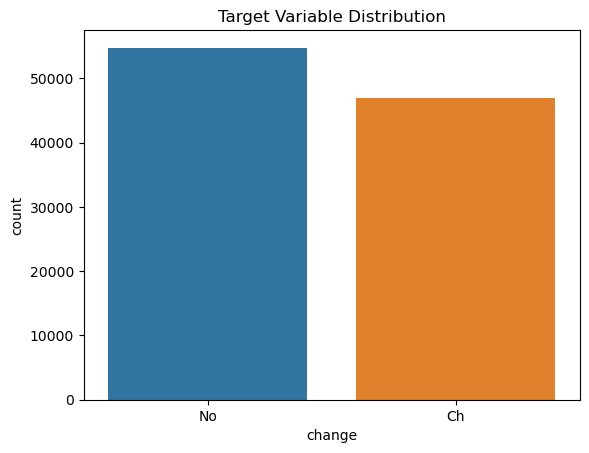

No    54755
Ch    47011
Name: change, dtype: int64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# count and Visualize target variable distribution
count_target = df['change'].value_counts()

sns.countplot(x='change', data=df)
plt.title('Target Variable Distribution')
plt.show()

print(count_target)

# class imbalance
- our target variable is 'change'
- from the plot visualizing distribution of change, we can see that there slight imbalance in the target variable

# Methods
1. data handling:
    * to avoid introducing high cardinality, categorical features will be encoded using label encoding. [1]
2. class balancing: 
    * models performed well without balancing
3. feature selection:
    * models performed well without feature elimantion 
4. testing and training:
    * the dataset will be split into a 80% training set, a 20% test set
5. hyperparameters tuning:
    * cross validation : 5 fold
6. performance metrics:
    * The following performance metrics will be used for evaluation:
        * accuracy
        * f1 score
        * precision
        * recall
        * AUC-ROC

# label encoding on the dataset



In [8]:
from sklearn.preprocessing import LabelEncoder

# initialize label encoder
encoder = LabelEncoder()

# make a copy of the dataframe, Apply label encoding to categorical variables 'objects' in df 
df_copy = df.copy()
df_encoded = df_copy.apply(lambda col: encoder.fit_transform(col) if col.dtype == 'object' else col)

# print encoded copy of df
df_encoded.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,0,6,25,1,1,41,0,1,...,0,1,1,0,0,0,0,1,0,2
1,2,0,1,1,1,7,3,59,0,18,...,0,3,1,0,0,0,0,0,1,1
2,0,0,2,1,1,7,2,11,5,13,...,0,1,1,0,0,0,0,1,1,2
3,2,1,3,1,1,7,2,44,1,16,...,0,3,1,0,0,0,0,0,1,2
4,2,1,4,1,1,7,1,51,0,8,...,0,2,1,0,0,0,0,0,1,2


# model 1: Decision Tree


In [9]:
# Define feature set and target variable
model_1X = df_encoded.drop('change', axis=1) # features
model_1y = df_encoded['change']   # target variable

print(model_1X.shape)
print(model_1y.shape)

(101766, 44)
(101766,)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

# split by 80% train and 20% test
model_1_X_train, model_1_X_test, model_1_y_train, model_1_y_test = train_test_split(model_1X, model_1y, test_size=0.2)

dt1 = DecisionTreeClassifier()
dt1.fit(model_1_X_train, model_1_y_train)
dt1.score(model_1_X_test, model_1_y_test)


0.9999508696079394

In [11]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

# Get the predicted labels from model
model_1_target_pred = dt1.predict(model_1_X_test)

# get probabilities of positive 
model_1_y_score = dt1.predict_proba(model_1_X_test)[:, 1]
roc_auc = roc_auc_score(model_1_y_test, model_1_y_score)
print(f"rou-auc score: {roc_auc}")

# f1 score
model_f1 = f1_score(model_1_y_test, model_1_target_pred)
print(f"f1 score: {model_f1}")

# Recall
model_recall = recall_score(model_1_y_test, model_1_target_pred)
print(f"recall: {model_recall}")

# Precision
model_precision = precision_score(model_1_y_test, model_1_target_pred)
print(f"precision: {model_precision}")


model_cm = confusion_matrix(model_1_y_test, model_1_target_pred)
print(f"confusion matrix: \n{model_cm}")

true_positives, false_positives, _ = roc_curve(model_1_y_test, model_1_y_score)



rou-auc score: 0.9999469608571125
f1 score: 0.999954243880119
recall: 1.0
precision: 0.9999084919472914
confusion matrix: 
[[ 9426     1]
 [    0 10927]]


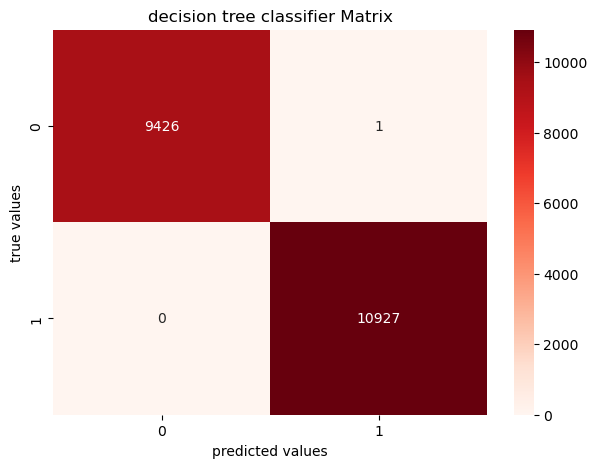

In [12]:
# Confusion matrix
model_cm = confusion_matrix(model_1_y_test, model_1_target_pred)

# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(model_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('decision tree classifier Matrix')
plt.show()

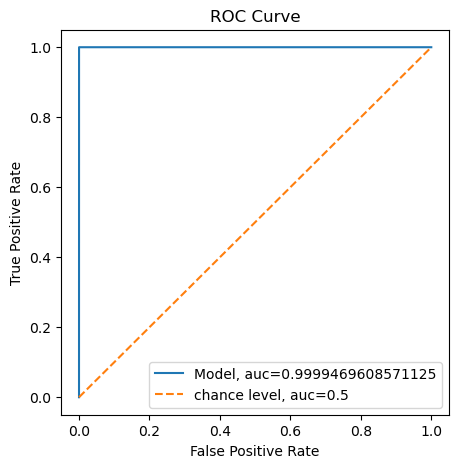

In [13]:
# model 1 rouc curve
plt.figure(figsize=(5,5))
plt.plot(true_positives, false_positives, label="Model, auc="+str(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="chance level, auc=0.5")  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

[Text(0.8533187984496124, 0.9857142857142858, 'X[42] <= 0.5\ngini = 0.497\nsamples = 81412\nvalue = [37584, 43828]'),
 Text(0.8378149224806202, 0.9571428571428572, 'gini = 0.0\nsamples = 18730\nvalue = [0, 18730]'),
 Text(0.8688226744186046, 0.9571428571428572, 'X[36] <= 0.5\ngini = 0.48\nsamples = 62682\nvalue = [37584, 25098]'),
 Text(0.8533187984496124, 0.9285714285714286, 'gini = 0.0\nsamples = 9684\nvalue = [9684, 0]'),
 Text(0.8843265503875969, 0.9285714285714286, 'X[36] <= 2.5\ngini = 0.499\nsamples = 52998\nvalue = [27900, 25098]'),
 Text(0.8688226744186046, 0.9, 'X[19] <= 1.5\ngini = 0.49\nsamples = 43937\nvalue = [18839, 25098]'),
 Text(0.7686531007751938, 0.8714285714285714, 'X[28] <= 1.5\ngini = 0.426\nsamples = 31305\nvalue = [9625, 21680]'),
 Text(0.6768410852713178, 0.8428571428571429, 'X[29] <= 1.5\ngini = 0.388\nsamples = 28024\nvalue = [7377, 20647]'),
 Text(0.5707364341085271, 0.8142857142857143, 'X[25] <= 1.5\ngini = 0.34\nsamples = 25341\nvalue = [5503, 19838]'),
 

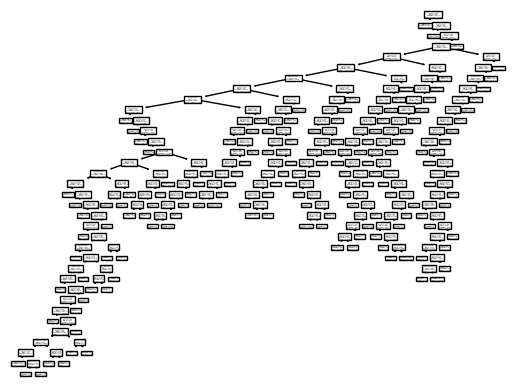

In [14]:
# plot the tree 
from sklearn import tree
tree.plot_tree(dt1) 

In [15]:
#from sklearn.tree import export_graphviz
#tree_pic = export_graphviz(dt1, out_file="mytree.pdf")


In [16]:
from sklearn.tree import export_text
r = export_text(dt1)
print(r)

|--- feature_42 <= 0.50
|   |--- class: 1
|--- feature_42 >  0.50
|   |--- feature_36 <= 0.50
|   |   |--- class: 0
|   |--- feature_36 >  0.50
|   |   |--- feature_36 <= 2.50
|   |   |   |--- feature_19 <= 1.50
|   |   |   |   |--- feature_28 <= 1.50
|   |   |   |   |   |--- feature_29 <= 1.50
|   |   |   |   |   |   |--- feature_25 <= 1.50
|   |   |   |   |   |   |   |--- feature_26 <= 1.50
|   |   |   |   |   |   |   |   |--- feature_23 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_26 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_26 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_25 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |   |   |   |--- feature_23 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_36 <=

# cross validation

In [17]:
from sklearn.model_selection import cross_val_score

# Create a Decision Tree Classifier
dt1 = DecisionTreeClassifier()

# 5-fold cross-validation
cv_scores = cross_val_score(dt1, model_1X, model_1y, cv=5) # accuracy is the defaultscoring method 

print("Cross-validation scores: ", cv_scores)
print("Mean of cross-validation score: ", cv_scores.mean())

Cross-validation scores:  [0.99921391 0.99965607 0.99965607 0.99975434 0.99990173]
Mean of cross-validation score:  0.9996364249603132


# model 2: KNN classifier 

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Define feature set and target variable
model_2X = df_encoded.drop('change', axis=1) # features
model_2y = df_encoded['change']   # target variable

print(model_2X.shape)
print(model_2y.shape)

(101766, 44)
(101766,)


In [19]:
model_2X_train, model_2X_test, model_2y_train, model_2y_test = train_test_split(model_2X, model_2y, test_size=0.2)
print('train set features:', model_2X_train.shape)
print('train set target:', model_2y_train.shape)

print('test set features:', model_2X_test.shape)
print('test set features:', model_2y_test.shape)

train set features: (81412, 44)
train set target: (81412,)
test set features: (20354, 44)
test set features: (20354,)


In [20]:
knn_clf_sk_3 = KNeighborsClassifier(n_neighbors=3)
knn_clf_sk_3.fit(model_2X_train, model_2y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
knn_clf_sk_3.score(model_2X_test, model_2y_test)

/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5610690773312371

In [22]:
knn_clf_sk_4 = KNeighborsClassifier(n_neighbors=5)
knn_clf_sk_4.fit(model_2X_train, model_2y_train)
knn_clf_sk_4.score(model_2X_test, model_2y_test)

/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5682421145720743

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 

# Fit the scaler to the training data
model_2X_train_scaled = scaler.fit_transform(model_2X_train)

# Transform the test
model_2X_test_scaled = scaler.transform(model_2X_test)

# fit model on scaled train data
knn_clf_sk_5 = KNeighborsClassifier(n_neighbors=5)
knn_clf_sk_5.fit(model_2X_train_scaled, model_2y_train)

# score on scaled data
knn_score = knn_clf_sk_5.score(model_2X_test_scaled, model_2y_test)
print("new score after scaling: ", knn_score)




/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


new score after scaling:  0.9061609511643903


In [24]:
model_2target_pred = knn_clf_sk_5.predict(model_2X_test_scaled) # get predicted labels for model

model_2y_score = knn_clf_sk_5.predict_proba(model_2X_test_scaled)[:,1]
model2_roc_auc = roc_auc_score(model_2y_test, model_2y_score)
print("rouc-auc score:", {model2_roc_auc})


# f1 score
model2_f1 = f1_score(model_2y_test, model_2target_pred)
print(f"f1 score: {model2_f1}")

# Recall
model2_recall = recall_score(model_2y_test, model_2target_pred)
print(f"recall: {model2_recall}")

# Precision
model2_precision = precision_score(model_2y_test, model_2target_pred)
print(f"precision: {model2_precision}")


model2_cm = confusion_matrix(model_2y_test, model_2target_pred)
print(f"confusion matrix: \n{model2_cm}")

true_positives2, false_positives2, _ = roc_curve(model_2y_test, model_2y_score)




/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


rouc-auc score: {0.9683494322485909}
f1 score: 0.9170791004601893
recall: 0.9642139857586269
precision: 0.8743377483443708
confusion matrix: 
[[ 7882  1518]
 [  392 10562]]


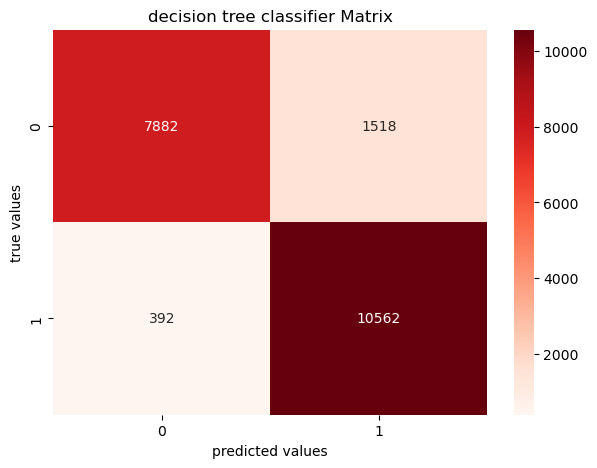

In [25]:
# Confusion matrix
model2_cm = confusion_matrix(model_2y_test, model_2target_pred)

# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(model2_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('decision tree classifier Matrix')
plt.show()

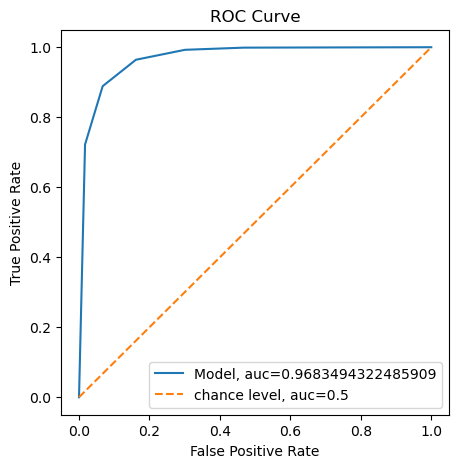

In [26]:
# model 1 rouc curve
plt.figure(figsize=(5,5))
plt.plot(true_positives2, false_positives2, label="Model, auc="+str(model2_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="chance level, auc=0.5")  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.show()

# cross validation.

In [27]:
from sklearn.model_selection import GridSearchCV

# parameters for cross validation
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

knn_clf = KNeighborsClassifier()


grid_search = GridSearchCV(knn_clf, param_grid, cv=5) # 5fold cross validation

# Fit the GridSearchCV object to the data
grid_search.fit(model_2X_train_scaled, model_2y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mercynwachukwu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

Best parameters:  {'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score:  0.9039453725309379


# Model 3: Random forest 

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define feature set and target variable
model_3X = df_encoded.drop('change', axis=1) # features
model_3y = df_encoded['change']   # target variable

print(model_3X.shape)
print(model_3y.shape)

(101766, 44)
(101766,)


In [29]:
model_3X_train, model3X_test, model_3y_train, model3y_test = train_test_split(model_3X, model_3y, test_size = 0.2)

model_rf = RandomForestClassifier()
model_rf.fit(model_3X_train, model_3y_train)

model3_y_predict = model_rf.predict(model3X_test)
# f1 score
model3_accuracy = accuracy_score(model3y_test, model3_y_predict)
print(f"accuracy score: {model3_accuracy}")



accuracy score: 0.995725655890734


In [30]:
model3_y_proba = model_rf.predict_proba(model3X_test)[:,1]

# ROC AUC score
model3_roc_auc = roc_auc_score(model3y_test, model3_y_proba)
print(f"ROC AUC score: {model3_roc_auc}")

# F1 score
model3_f1 = f1_score(model3y_test, model3_y_predict)
print(f"F1 score: {model3_f1}")

# Recall
model3_recall = recall_score(model3y_test, model3_y_predict)
print(f"Recall: {model3_recall}")

# Precision
model3_precision = precision_score(model3y_test, model3_y_predict)
print(f"Precision: {model3_precision}")



# Confusion Matrix
model3_cm = confusion_matrix(model3y_test, model3_y_predict)
print(f"Confusion Matrix: \n{model3_cm}")

# roc curve

true_positives3, false_positives3, _ = roc_curve(model3y_test, model3_y_proba)



ROC AUC score: 0.9998088451832363
F1 score: 0.9960574613676532
Recall: 0.9999090164680193
Precision: 0.99223546406645
Confusion Matrix: 
[[ 9277    86]
 [    1 10990]]


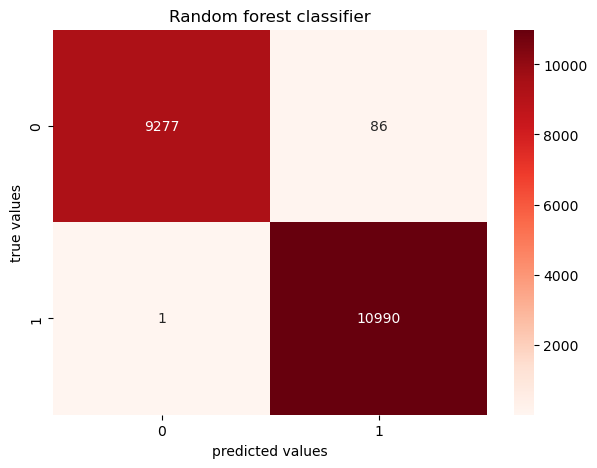

In [31]:
# Plot the confusion matrix 
plt.figure(figsize=(7,5))
sns.heatmap(model3_cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('predicted values')
plt.ylabel('true values')
plt.title('Random forest classifier')
plt.show()

# roc curve of all models


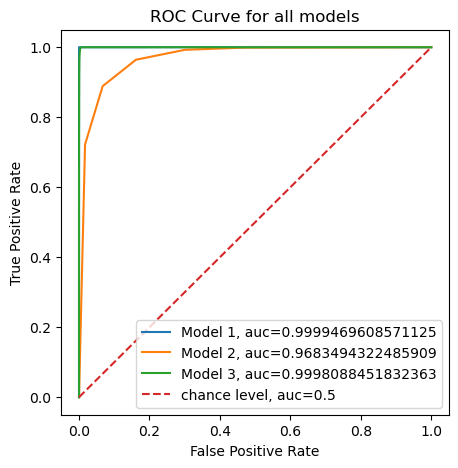

In [32]:
# model 1 rouc curve
plt.figure(figsize=(5,5))
plt.plot(true_positives, false_positives, label="Model 1, auc="+str(roc_auc))
plt.plot(true_positives2, false_positives2, label="Model 2, auc="+str(model2_roc_auc))
plt.plot(true_positives3, false_positives3, label="Model 3, auc="+str(model3_roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', label="chance level, auc=0.5")  # Random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all models')
plt.legend(loc=4)
plt.show()



# references

1. Analytics Vidhya. (2020, August 13). Types of Categorical Data Encoding. Retrieved from https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
2. Swalin, A. (2018, Jan 1). How to Handle Missing Data. Towards Data Science. Retrieved from https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4
3. DataCamp. (n.d.). Random Forests Classifier in Python. DataCamp. Retrieved from https://www.datacamp.com/tutorial/random-forests-classifier-python

